In [1]:
import torch
from torchvision.datasets import MNIST
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 5]

In [2]:
import numpy as np
import os
import shutil

In [3]:
!rm -rf /kaggle/working/*

In [4]:
# Function for Creating Train / Validation / Test folders (One time use Only)

def TrainValTestSplit(root_dir, classes_dir, main = "CROPPED", val_ratio = 0.10, test_ratio = 0.10):
    for cls in classes_dir:
        # Creating Split Folders
        os.makedirs('CervicalCancerSplitDataset/train/' + cls)
        os.makedirs('CervicalCancerSplitDataset/valid/' + cls)
        os.makedirs('CervicalCancerSplitDataset/test/' + cls)

        # Folder to copy images from
        src = os.path.join(root_dir, cls, main);

        # Spliting the Files in the Given ratio
        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), int(len(allFileNames)* (1 - test_ratio))])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

        # Printing the Split Details
        print(cls,':')
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, 'CervicalCancerSplitDataset/train/' + cls)

        for name in val_FileNames:
            shutil.copy(name, 'CervicalCancerSplitDataset/valid/' + cls)

        for name in test_FileNames:
            shutil.copy(name, 'CervicalCancerSplitDataset/test/' + cls)
        print();
        

# Preforming Train / Validation / Test Split
root_dir = "/kaggle/input/cervical-cancer-formatted-dataset/content/CervicalCancerFormattedDataset"               # Dataset Root Folder
classes_dir = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]   # Classes
TrainValTestSplit(root_dir, classes_dir);

Dyskeratotic :
Total images:  813
Training:  650
Validation:  81
Testing:  82

Koilocytotic :
Total images:  825
Training:  660
Validation:  82
Testing:  83

Metaplastic :
Total images:  793
Training:  634
Validation:  79
Testing:  80

Parabasal :
Total images:  787
Training:  629
Validation:  79
Testing:  79

Superficial-Intermediate :
Total images:  831
Training:  664
Validation:  83
Testing:  84



In [5]:
# Define custom transform function
transform = transforms.Compose([transforms.ToTensor()])

train_data_dir = '/kaggle/working/CervicalCancerSplitDataset/train'
valid_data_dir = '/kaggle/working/CervicalCancerSplitDataset/valid'
test_data_dir = '/kaggle/working/CervicalCancerSplitDataset/test'
# Load the datasets
train_dataset = datasets.ImageFolder(train_data_dir, transform=transform)
valid_dataset = datasets.ImageFolder(valid_data_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_data_dir, transform=transform)

# Calculate mean and std for the entire training dataset
train_pixel_values = torch.cat([img for img, _ in train_dataset], 1)
train_mean = train_pixel_values.mean([1, 2])
train_std = train_pixel_values.std([1, 2])

# Calculate mean and std for the entire validation dataset
valid_pixel_values = torch.cat([img for img, _ in valid_dataset], 1)
valid_mean = valid_pixel_values.mean([1, 2])
valid_std = valid_pixel_values.std([1, 2])

# Calculate mean and std for the entire validation dataset
test_pixel_values = torch.cat([img for img, _ in test_dataset], 1)
test_mean = test_pixel_values.mean([1, 2])
test_std = test_pixel_values.std([1, 2])

# Print mean and std for training data
print("Mean and std for training data:")
print("Mean:", train_mean)
print("Std:", train_std)

# Print mean and std for validation data
print("\nMean and std for validation data:")
print("Mean:", valid_mean)
print("Std:", valid_std)

# Print mean and std for validation data
print("\nMean and std for test data:")
print("Mean:", test_mean)
print("Std:", test_std)

Mean and std for training data:
Mean: tensor([0.5080, 0.4966, 0.5866])
Std: tensor([0.2121, 0.2060, 0.2261])

Mean and std for validation data:
Mean: tensor([0.5102, 0.5005, 0.5906])
Std: tensor([0.2107, 0.2072, 0.2245])

Mean and std for test data:
Mean: tensor([0.5127, 0.5010, 0.5938])
Std: tensor([0.2085, 0.2067, 0.2277])


In [6]:
import torch
from torchvision import datasets, transforms

data_dir = '/kaggle/working/CervicalCancerSplitDataset'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([#transforms.RandomRotation(30),
                                        transforms.RandomResizedCrop(28),  # Random crop to 66x66 pixels
                                        transforms.RandomHorizontalFlip(),  # Random horizontal flip
#                                             transforms.RandomAffine(degrees=0, scale=(0.8, 1.2), shear=0.2),  # Random affine transformations for zoom and shear
#                                         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random changes to brightness, contrast, saturation, and hue
                                        transforms.ToTensor(),  # Convert the image to a PyTorch tensor
                                        transforms.Normalize(train_mean.tolist(), train_std.tolist())
])

valid_transforms = transforms.Compose([
#                                     transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(28),
                                     transforms.ToTensor(),
                                     transforms.Normalize(valid_mean.tolist(), valid_std.tolist())
])

test_transforms = transforms.Compose([
#                                     transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(28),
                                     transforms.ToTensor(),
                                     transforms.Normalize(test_mean.tolist(), test_std.tolist())
])



# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=valid_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=5)
testloader = torch.utils.data.DataLoader(test_data, batch_size=5)
valloader = torch.utils.data.DataLoader(valid_data, batch_size=5)

In [7]:
# Count the occurrences of each class label
class_counts = {}
for _, label in valid_dataset:
    class_counts[label] = class_counts.get(label, 0) + 1

# Print the counts for each class
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

Class 0: 81 samples
Class 1: 82 samples
Class 2: 79 samples
Class 3: 79 samples
Class 4: 83 samples


In [8]:
# Count the occurrences of each class label
class_counts = {}
for _, label in test_dataset:
    class_counts[label] = class_counts.get(label, 0) + 1

# Print the counts for each class
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

Class 0: 82 samples
Class 1: 83 samples
Class 2: 80 samples
Class 3: 79 samples
Class 4: 84 samples


In [9]:
total_train_size = len(train_data)
total_test_size = len(test_data)
total_dev_size = len(valid_data)

classes = 5
input_dim = 784

num_clients = 3
rounds = 30
batch_size = 5
epochs_per_client = 10
learning_rate = .01

In [10]:
total_train_size, total_dev_size, total_test_size

(3237, 404, 408)

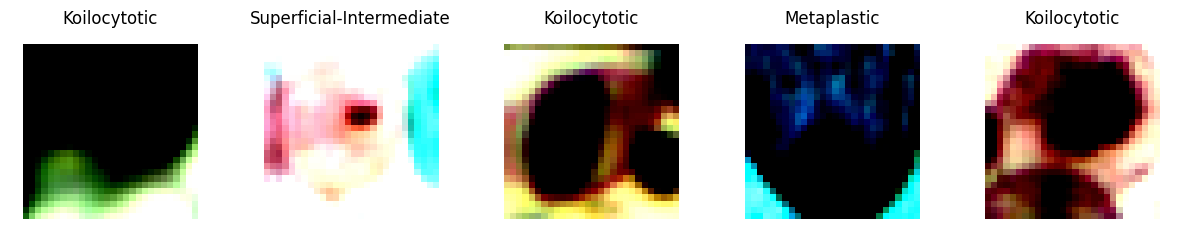

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with a border
def show_images_with_border(images, labels, classes, border_color='black', border_width=2):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 3))

    for ax, image, label in zip(axes, images, labels):
        # Add a border around the image
        bordered_image = np.ones((image.shape[1] + 2 * border_width, image.shape[2] + 2 * border_width, 3))
        bordered_image[border_width:-border_width, border_width:-border_width, :] = np.transpose(image.numpy(), (1, 2, 0))

        ax.imshow(bordered_image)
        ax.set_title(classes_dir[label])
        ax.axis('off')

    plt.show()

# Display 5 images from train_data in a row with labels and a border
num_images_to_display = 5
sample_indices = np.random.choice(len(train_data), num_images_to_display, replace=False)

sample_images = [train_data[idx][0] for idx in sample_indices]
sample_labels = [train_data[idx][1] for idx in sample_indices]

show_images_with_border(sample_images, sample_labels, classes, border_color='black', border_width=2)

In [12]:
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(DataLoader):
        def __init__(self, dl, device):
            self.dl = dl
            self.device = device

        def __iter__(self):
            for batch in self.dl:
                yield to_device(batch, self.device)

        def __len__(self):
            return len(self.dl)

device = get_device()

In [13]:
class FederatedNet(torch.nn.Module):    
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = torch.nn.Linear(64 * 7 * 7, 128)
        self.fc2 = torch.nn.Linear(128, 5)
        self.track_layers = {'conv1': self.conv1, 'conv2': self.conv2, 'fc1': self.fc1, 'fc2': self.fc2}

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
    def get_track_layers(self):
        return self.track_layers
    
    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name in parameters_dict:
                self.track_layers[layer_name].weight.data *= 0
                self.track_layers[layer_name].bias.data *= 0
                self.track_layers[layer_name].weight.data += parameters_dict[layer_name]['weight']
                self.track_layers[layer_name].bias.data += parameters_dict[layer_name]['bias']
    
    def get_parameters(self):
        parameters_dict = dict()
        for layer_name in self.track_layers:
            parameters_dict[layer_name] = {
                'weight': self.track_layers[layer_name].weight.data, 
                'bias': self.track_layers[layer_name].bias.data
            }
        return parameters_dict
    
    def batch_accuracy(self, outputs, labels):
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))
    
    def _process_batch(self, batch):
        images, labels = batch
        outputs = self(images)
        loss = torch.nn.functional.cross_entropy(outputs, labels)
        accuracy = self.batch_accuracy(outputs, labels)
        return (loss, accuracy)
    
    def fit(self, dataset, epochs, lr, batch_size=10, opt=torch.optim.SGD):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size, shuffle=True), device)
        optimizer = opt(self.parameters(), lr)
        history = []
        for epoch in range(epochs):
            losses = []
            accs = []
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                loss.detach()
                losses.append(loss)
                accs.append(acc)
            avg_loss = torch.stack(losses).mean().item()
            avg_acc = torch.stack(accs).mean().item()
            history.append((avg_loss, avg_acc))
        return history
    
    def evaluate(self, dataset, batch_size=128):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size), device)
        losses = []
        accs = []
        with torch.no_grad():
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                losses.append(loss)
                accs.append(acc)
        avg_loss = torch.stack(losses).mean().item()
        avg_acc = torch.stack(accs).mean().item()
        return (avg_loss, avg_acc)

In [14]:
class Client:
    def __init__(self, client_id, dataset):
        self.client_id = client_id
        self.dataset = dataset
    
    def get_dataset_size(self):
        return len(self.dataset)
    
    def get_client_id(self):
        return self.client_id
    
    def train(self, parameters_dict):
        net = to_device(FederatedNet(), device)
        net.apply_parameters(parameters_dict)
        train_history = net.fit(self.dataset, epochs_per_client, learning_rate, batch_size)
        print('{}: Loss = {}, Accuracy = {}'.format(self.client_id, round(train_history[-1][0], 4), round(train_history[-1][1], 4)))
        return net.get_parameters()

In [15]:
examples_per_client = total_train_size // num_clients
client_datasets = random_split(train_data, [min(i + examples_per_client, 
           total_train_size) - i for i in range(0, total_train_size, examples_per_client)])
clients = [Client('client_' + str(i), client_datasets[i]) for i in range(num_clients)]

In [16]:
from collections import Counter
# Calculate examples_per_class for each client
examples_per_client_per_class = Counter()

for client in clients:
    client_name = client.client_id
    client_dataset = client.dataset
    
    # Count examples per class in the client dataset
    class_counts = Counter([label for _, label in client_dataset])
    
    # Store the counts for each client
    examples_per_client_per_class[client_name] = class_counts

# Print the results
for client_name, class_counts in examples_per_client_per_class.items():
    print(f"{client_name} examples per class:")
    for class_label, count in class_counts.items():
        print(f"Class {class_label}: {count} samples")
    print()

client_0 examples per class:
Class 1: 226 samples
Class 3: 216 samples
Class 0: 224 samples
Class 2: 197 samples
Class 4: 216 samples

client_1 examples per class:
Class 3: 209 samples
Class 1: 195 samples
Class 0: 208 samples
Class 2: 226 samples
Class 4: 241 samples

client_2 examples per class:
Class 1: 239 samples
Class 0: 218 samples
Class 4: 207 samples
Class 3: 204 samples
Class 2: 211 samples



## Training

In [17]:
global_net = to_device(FederatedNet(), device)
history = []
history2 = []
for i in range(rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for client in clients:
        client_parameters = client.train(curr_parameters)
        fraction = client.get_dataset_size() / total_train_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
    global_net.apply_parameters(new_parameters)
    
    train_loss, train_acc = global_net.evaluate(train_data, batch_size)
    dev_loss, dev_acc = global_net.evaluate(valid_data, batch_size)
    print('After round {}, train_loss = {}, dev_loss = {}, train_acc = {}, dev_acc = {}\n'.format(i + 1, round(train_loss, 4), round(dev_loss, 4), round(train_acc, 4), round(dev_acc, 4)))
    history.append((train_acc, dev_acc))
    history2.append((train_loss, dev_loss))

Start Round 1 ...
client_0: Loss = 0.6812, Accuracy = 0.737
client_1: Loss = 0.6815, Accuracy = 0.763
client_2: Loss = 0.6817, Accuracy = 0.7463
After round 1, train_loss = 0.6128, dev_loss = 0.6398, train_acc = 0.7645, dev_acc = 0.7648

Start Round 2 ...
client_0: Loss = 0.5112, Accuracy = 0.8009
client_1: Loss = 0.4777, Accuracy = 0.8259
client_2: Loss = 0.5266, Accuracy = 0.8035
After round 2, train_loss = 0.4804, dev_loss = 0.5175, train_acc = 0.8211, dev_acc = 0.7951

Start Round 3 ...
client_0: Loss = 0.4457, Accuracy = 0.8345
client_1: Loss = 0.4071, Accuracy = 0.8606
client_2: Loss = 0.4369, Accuracy = 0.8407
After round 3, train_loss = 0.3917, dev_loss = 0.4501, train_acc = 0.8515, dev_acc = 0.8346

Start Round 4 ...
client_0: Loss = 0.3891, Accuracy = 0.8611
client_1: Loss = 0.3418, Accuracy = 0.8778
client_2: Loss = 0.3871, Accuracy = 0.8648
After round 4, train_loss = 0.324, dev_loss = 0.3623, train_acc = 0.8781, dev_acc = 0.8741

Start Round 5 ...
client_0: Loss = 0.3816, 

## Evaluation

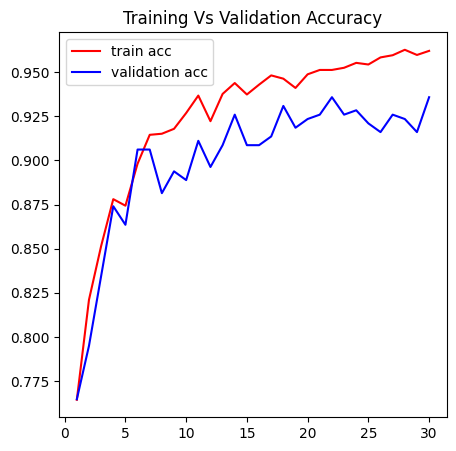

In [18]:
plt.plot([i + 1 for i in range(len(history))], [history[i][0] for i in range(len(history))], color='r', label='train acc')
plt.plot([i + 1 for i in range(len(history))], [history[i][1] for i in range(len(history))], color='b', label='validation acc')
plt.legend()
plt.title('Training Vs Validation Accuracy')
plt.show()

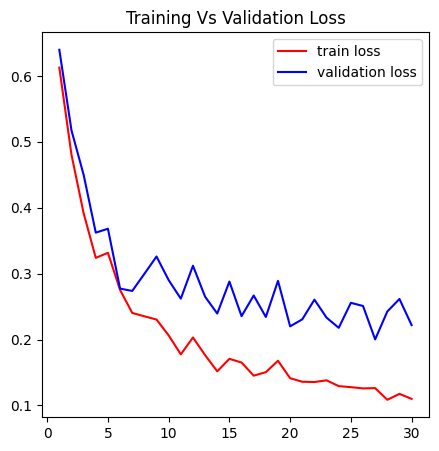

In [19]:
plt.plot([i + 1 for i in range(len(history2))], [history2[i][0] for i in range(len(history2))], color='r', label='train loss')
plt.plot([i + 1 for i in range(len(history2))], [history2[i][1] for i in range(len(history2))], color='b', label='validation loss')
plt.legend()
plt.title('Training Vs Validation Loss')
plt.show()

In [20]:
# evaluate accuracy after training
global_net.eval()

FederatedNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
)

In [21]:
len(test_data)

408

In [22]:
# def load_checkpoint(filepath):
#     checkpoint = torch.load(filepath)
# #     print(checkpoint)
#     model = checkpoint['model']
#     model.load_state_dict(checkpoint['state_dict'])
#     for parameter in model.parameters():
#         parameter.requires_grad = False

#     model.eval()
#     return model

# global_net = load_checkpoint('/kaggle/input/non-iid-fedavg/pytorch/noniid/1/checkpoint (1).pth')
# global_net.state_dict()

In [23]:
# Make predictions on the test set
all_predictions = []
true_labels = []
with torch.no_grad():
    for test_data, test_labels in testloader:
        outputs = global_net(test_data)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.numpy())
        true_labels.extend(test_labels.numpy())

# 'all_predictions' now contains the predicted class labels, and 'true_labels' contains the true class labels
print("Predictions:", all_predictions)
print("True Labels:", true_labels)

Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 4, 2,

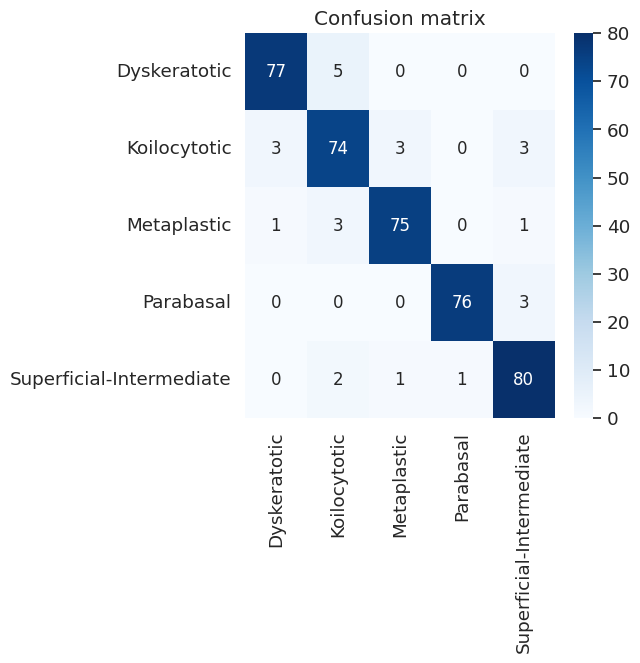

In [24]:
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.metrics import confusion_matrix
# Convert lists to numpy arrays
all_predictions_ = np.array(all_predictions)
true_labels_ = np.array(true_labels)

# Display confusion matrix using seaborn heatmap
class_names = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]   # Classes
CM = confusion_matrix(true_labels, all_predictions)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 12}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax, cmap='Blues')
ax.set_title('Confusion matrix')
plt.show()

In [25]:
global_net.eval()

FederatedNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming you have 'all_predictions' and 'true_labels' from the previous code snippet

# Calculate and print accuracy
prec_score = precision_score(true_labels, all_predictions, average='weighted') * 100
rec_score = recall_score(true_labels, all_predictions, average='weighted') * 100
f1score = f1_score(true_labels, all_predictions, average='weighted') * 100

print(f'precision score was {prec_score:6.2f}%\nrecall score was {rec_score:6.2f}%')
print(f'f1 score was {f1score:6.2f}%\n')
accuracy = accuracy_score(true_labels, all_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Calculate and print precision, recall, and F1-score for each class
precision = precision_score(true_labels, all_predictions, average=None)
recall = recall_score(true_labels, all_predictions, average=None)
f1 = f1_score(true_labels, all_predictions, average=None)

for i in range(len(precision)):
    print(f'Class {i} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-score: {f1[i]:.4f}')

# Print the overall classification report
print('\nClassification Report:')
print(classification_report(true_labels, all_predictions))

precision score was  93.68%
recall score was  93.63%
f1 score was  93.65%

Accuracy: 0.9363
Class 0 - Precision: 0.9506, Recall: 0.9390, F1-score: 0.9448
Class 1 - Precision: 0.8810, Recall: 0.8916, F1-score: 0.8862
Class 2 - Precision: 0.9494, Recall: 0.9375, F1-score: 0.9434
Class 3 - Precision: 0.9870, Recall: 0.9620, F1-score: 0.9744
Class 4 - Precision: 0.9195, Recall: 0.9524, F1-score: 0.9357

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        82
           1       0.88      0.89      0.89        83
           2       0.95      0.94      0.94        80
           3       0.99      0.96      0.97        79
           4       0.92      0.95      0.94        84

    accuracy                           0.94       408
   macro avg       0.94      0.94      0.94       408
weighted avg       0.94      0.94      0.94       408



In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch

In [28]:
# Displays the ROC AUC for each class
from sklearn.metrics import roc_auc_score
# Convert lists to numpy arrays
all_predictions_ = np.array(all_predictions)
true_labels_ = np.array(true_labels)
def roc_auc_score_multiclass(actual_class, pred_class, average = "micro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

print("ROC AUC score for each class")
# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier
lr_roc_auc_multiclass = roc_auc_score_multiclass(true_labels, all_predictions)
print(lr_roc_auc_multiclass)

ROC AUC score for each class
{0: 0.9633772257967979, 1: 0.9303985171455051, 2: 0.9626524390243902, 3: 0.9794929013889423, 4: 0.9653880070546738}


In [29]:
preds = torch.zeros((0,5))
labels = torch.zeros((0))
global_net.eval()
with torch.no_grad():
    for i, (images, label) in enumerate(testloader):
        pred = global_net(images)
        preds = torch.cat((preds,pred),dim = 0)
        labels = torch.cat((labels,label.float()))

# one hot encoding test labels
y_true = np.zeros(preds.shape)
for i in range (preds.shape[0]):
    for j in range(preds.shape[1]):
        y_true[i][j] = 1 if labels[i]== j else 0

In [30]:
y_true

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [31]:
preds

tensor([[  7.4117,   2.1946,   0.3597,  -4.7078,  -6.3720],
        [ 10.4419,   0.9619,  -4.1064,  -5.2501,  -3.5978],
        [ 10.0280,  -0.0358,  -0.6340,  -5.9710,  -4.3730],
        ...,
        [ -8.0092,   5.5348,  -5.6292, -13.4559,  19.4591],
        [ -5.8247,   2.8383,  -6.4231,  -5.0161,  13.7265],
        [ -8.5893,   2.5947,  -0.9699,  -5.5605,  11.3997]])

In [32]:
labels

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = preds.shape[1]
out = preds.cpu().detach().numpy()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], out[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), out.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [34]:
y_true.ravel()

array([1., 0., 0., ..., 0., 0., 1.])

In [35]:
out.ravel()

array([ 7.411713  ,  2.1945615 ,  0.35969016, ..., -0.9699472 ,
       -5.560507  , 11.399748  ], dtype=float32)

In [36]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
out = preds.cpu().detach().numpy()
print(out)
roc_auc_score(y_true.ravel(), out.ravel(), labels = classes_dir, multi_class = 'ovr', average = 'micro')

[[  7.411713     2.1945615    0.35969016  -4.7077937   -6.371988  ]
 [ 10.441912     0.96189696  -4.106378    -5.250072    -3.5977645 ]
 [ 10.027989    -0.03583115  -0.6340244   -5.9710007   -4.372974  ]
 ...
 [ -8.009225     5.534777    -5.6292286  -13.455854    19.459097  ]
 [ -5.82471      2.8383303   -6.4231296   -5.0161214   13.7264595 ]
 [ -8.589282     2.5947251   -0.9699472   -5.560507    11.399748  ]]


0.979935601691657

In [37]:
# true_labels_

In [38]:
# all_predictions

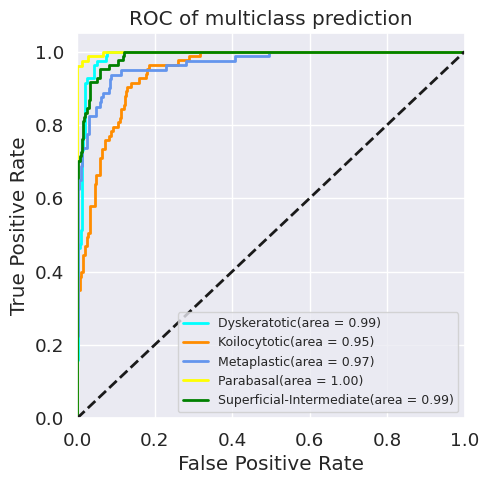

In [39]:
# First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

#     # Finally average it and compute AUC
#     mean_tpr /= n_classes

#     fpr["macro"] = all_fpr
#     tpr["macro"] = mean_tpr
#     roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plot all ROC curves
# plt.figure()
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )

# plt.plot(
#     fpr["macro"],
#     tpr["macro"],
#     label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
#     color="navy",
#     linestyle=":",
#     linewidth=4,
# )

colors = cycle(["aqua", "darkorange", "cornflowerblue", "yellow","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="{0}(area = {1:0.2f})".format(classes_dir[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of multiclass prediction")
# Adding legend with fontsize and lower right alignment
plt.legend(loc="lower right", fontsize='9')
plt.show()

In [40]:
_, y_pred = torch.max(preds, dim=1)

In [41]:
from sklearn.metrics import classification_report
target_names = [classes_dir[i] for i in range(5)]
print(classification_report(labels.cpu(), y_pred.cpu(), target_names = target_names))
print('Note: In binary classification, recall of the positive class is also known as “sensitivity”; \n\
recall of the negative class is “specificity”.')

                          precision    recall  f1-score   support

            Dyskeratotic       0.99      0.93      0.96        82
            Koilocytotic       0.86      0.96      0.91        83
             Metaplastic       0.96      0.86      0.91        80
               Parabasal       0.99      0.95      0.97        79
Superficial-Intermediate       0.92      0.99      0.95        84

                accuracy                           0.94       408
               macro avg       0.94      0.94      0.94       408
            weighted avg       0.94      0.94      0.94       408

Note: In binary classification, recall of the positive class is also known as “sensitivity”; 
recall of the negative class is “specificity”.


In [42]:
# Calculate and print test accuracy
accuracy = accuracy_score(labels.cpu(), y_pred.cpu())
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9387


In [43]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize
# from torch.utils.data import DataLoader
# import torch.nn.functional as F
# import torch

# model=global_net
# # Assuming you have 'all_predictions' and 'true_labels' from the previous code snippet
# # Assuming you have a PyTorch model named 'model' and a DataLoader named 'testloader'

# # Set the model to evaluation mode
# model.eval()

# # Initialize lists to store true labels and predicted probabilities
# true_labels = []
# predicted_probs = []

# # Iterate through the test set and collect true labels and predicted probabilities
# with torch.no_grad():
#     for test_data, test_labels in testloader:
#         outputs = model(test_data)
#         probs = F.softmax(outputs, dim=1)
#         true_labels.extend(test_labels.numpy())
#         predicted_probs.extend(probs.numpy())

# # Convert lists to numpy arrays
# true_labels = np.array(true_labels)
# predicted_probs = np.array(predicted_probs)

# # Binarize the true labels
# num_classes = 5
# true_labels_bin = label_binarize(true_labels, classes=np.arange(num_classes))

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(num_classes):
#     fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predicted_probs[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot ROC curves
# plt.figure(figsize=(10, 8))
# for i in range(num_classes):
#     plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Multiclass Classification')
# plt.legend(loc='lower right')
# plt.show()

## Save the model

In [44]:
checkpoint = {'model': FederatedNet(),
          'state_dict': global_net.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [45]:
from sklearn.metrics import classification_report
target_names = [classes_dir[i] for i in range(5)]
print(classification_report(labels.cpu(), y_pred.cpu(), target_names = target_names))
print('Note: In binary classification, recall of the positive class is also known as “sensitivity”; \n\
recall of the negative class is “specificity”.')

                          precision    recall  f1-score   support

            Dyskeratotic       0.99      0.93      0.96        82
            Koilocytotic       0.86      0.96      0.91        83
             Metaplastic       0.96      0.86      0.91        80
               Parabasal       0.99      0.95      0.97        79
Superficial-Intermediate       0.92      0.99      0.95        84

                accuracy                           0.94       408
               macro avg       0.94      0.94      0.94       408
            weighted avg       0.94      0.94      0.94       408

Note: In binary classification, recall of the positive class is also known as “sensitivity”; 
recall of the negative class is “specificity”.


In [46]:
# import seaborn as sns; sns.set(font_scale=1.4)
# from sklearn.metrics import confusion_matrix
# import numpy as np

# # Make predictions on the test set
# all_predictions = []
# true_labels = []
# with torch.no_grad():
#     for test_data, test_labels in testloader:
#         outputs = model(test_data)
#         _, predictions = torch.max(outputs, 1)
#         all_predictions.extend(predictions.numpy())
#         true_labels.extend(test_labels.numpy())

# # 'all_predictions' now contains the predicted class labels, and 'true_labels' contains the true class labels
# print("Predictions:", all_predictions)
# print("True Labels:", true_labels)

# # Convert lists to numpy arrays
# all_predictions_ = np.array(all_predictions)
# true_labels_ = np.array(true_labels)

# # Display confusion matrix using seaborn heatmap
# class_names = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]   # Classes
# CM = confusion_matrix(true_labels_, all_predictions_)
# ax = plt.axes()
# sns.heatmap(CM, annot=True, 
#            annot_kws={"size": 10}, 
#            xticklabels=class_names, 
#            yticklabels=class_names, ax = ax, )
# ax.set_title('Confusion matrix')
# plt.show()

## Visualize the model

In [47]:
! pip install -q torchview
! pip install -q -U graphviz

In [48]:
import torch
from torchvision.models import vgg16, resnet18, GoogLeNet, densenet, vit_b_16

from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')

'svg'

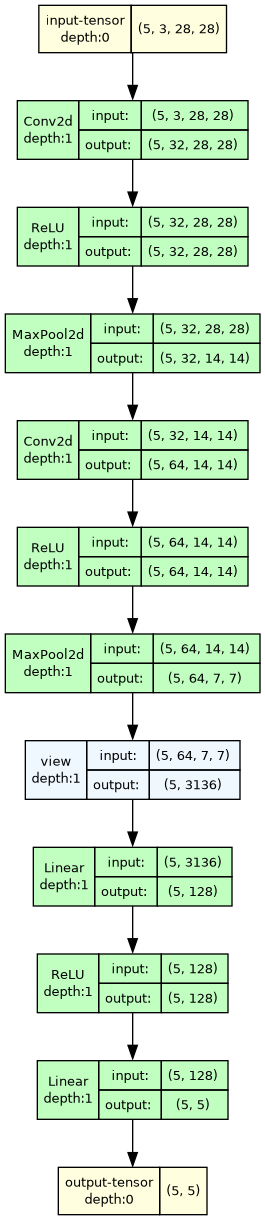

In [49]:
model=FederatedNet()
#depth: Upper limit for depth of nodes to be shown in visualization.
        #Depth is measured how far is module/tensor inside the module hierarchy.
#model_graph = draw_graph(model, input_size=[(1,3,224,224),] ,depth=1 ,expand_nested=True)
model_graph = draw_graph(global_net, input_size=[(5,3,28,28)],expand_nested=True )
model_graph.resize_graph(scale=5.0) # scale as per the view
#model_graph.visual_graph.render(format='svg')
model_graph.visual_graph

In [50]:
model_graph.visual_graph.render(format='png')

'model.gv.png'